<a href="https://colab.research.google.com/github/brokentwigs/Colab-Analysis/blob/main/TermDocumentMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from pylab import rcParams
rcParams['figure.figsize'] = 7,5
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [ ]:
s1 = "computer science and math is fun school is what makes it extremely boring and irritating"
s2 = "My school is looking for a computer science and math high school teacher to hire. Great kids and best school in Cleveland, fun and passionate staff, a principal that supports and truly cares, too salary."
s3 = "there’s only two hard problems in computer science, naming things and deciding what to do after you burn out"
s4 = "Americans barely understand math, history, science, philosophy, religion, economics, art, civics, music, and finance. "
s5 = "Anyone else feeling defeated, confused & unable to grasp why science & math seem so difficult for people to follow?"
s6 = "I hope the field of computer science never loses its sense of fun."
s7 = "Social science is hard because stochasticity and HAVE YOU MET PEOPLE?"
s8 = "Cooking is only fun when 1. nobody tells you to do it 2. nobody is in the kitchen with you"
s9 = "dogs are mad funny like you was just sleeping why tf are you following me to the kitchen lmfaoo"
s10 = "BITCHES BE LIKE I HATE SCHOOL THEN GETS ADMITTED TO A MASTERS PROGRAM FOR DATA SCIENCE"

In [ ]:
docs = [s1, s2, s3,s4,s5,s6,s7,s8,s9,s10]
print(docs)

['computer science and math is fun school is what makes it extremely boring and irritating', 'My school is looking for a computer science and math high school teacher to hire. Great kids and best school in Cleveland, fun and passionate staff, a principal that supports and truly cares, too salary.', 'there’s only two hard problems in computer science, naming things and deciding what to do after you burn out', 'Americans barely understand math, history, science, philosophy, religion, economics, art, civics, music, and finance. ', 'Anyone else feeling defeated, confused & unable to grasp why science & math seem so difficult for people to follow?', 'I hope the field of computer science never loses its sense of fun.', 'Social science is hard because stochasticity and HAVE YOU MET PEOPLE?', 'Cooking is only fun when 1. nobody tells you to do it 2. nobody is in the kitchen with you', 'dogs are mad funny like you was just sleeping why tf are you following me to the kitchen lmfaoo', 'BITCHES BE

In [ ]:
vec = CountVectorizer()
X = vec.fit_transform(docs)

In [ ]:
len(X.toarray())

10

In [ ]:
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_limit = df[['and',
'are',
'computer',
'is',
'science',
'school',
'to',
'kitchen',
'admitted',
'understand'
]]
df_limit

,and,are,computer,is,science,school,to,kitchen,admitted,understand
0,2,0,1,2,1,1,0,0,0,0
1,4,0,1,1,1,3,1,0,0,0
2,1,0,1,0,1,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,1
4,0,0,0,0,1,0,2,0,0,0
5,0,0,1,0,1,0,0,0,0,0
6,1,0,0,1,1,0,0,0,0,0
7,0,0,0,2,0,0,1,1,0,0
8,0,2,0,0,0,0,1,1,0,0
9,0,0,0,0,1,1,1,0,1,0


In [ ]:
tweetMatrix = df_limit.to_numpy().transpose()

In [ ]:
#compute SVD
import numpy as np

u, s, vh = np.linalg.svd(tweetMatrix)

df_coordinates = pd.DataFrame(columns=['cx','cy','dx','dy'])
u1 = []
u2 = []
v1 = []
v2 = []
for j in range(10):
  u1.append(np.dot(np.absolute(u[0]).transpose(), np.eye(1,10,j)[0]))
  u2.append(np.dot(u[1].transpose(), np.eye(1,10,j)[0]))
  v1.append(np.dot(np.absolute(vh[0]).transpose(), np.eye(1,10,j)[0]))
  v2.append(np.dot(vh[1].transpose(), np.eye(1,10,j)[0]))

df_coordinates['cx'] = u1
df_coordinates['cy'] = u2
df_coordinates['dx'] = v1
df_coordinates['dy'] = v2

df_coordinates


,cx,cy,dx,dy
0,0.692685,-0.013031,0.455155,-0.123182
1,0.320082,0.366075,0.782495,-0.233354
2,0.055672,0.036115,0.222936,0.201613
3,0.171262,0.538552,0.156244,-0.031425
4,0.244297,0.572596,0.119906,0.552047
5,0.226796,-0.021924,0.083597,0.064810
6,0.335424,0.296403,0.201455,0.007311
7,0.139336,-0.274881,0.137004,0.410394
8,0.371041,-0.101417,0.043466,0.573148
9,0.067764,-0.269126,0.154314,0.287759


In [ ]:
cx = df_coordinates['cx']
cy = df_coordinates['cy']
dx = df_coordinates['dx']
dy = df_coordinates['dy']

In [ ]:
keywords = ['and',
'are',
'computer',
'is',
'science',
'school',
'to',
'kitchen',
'admitted',
'understand'
]

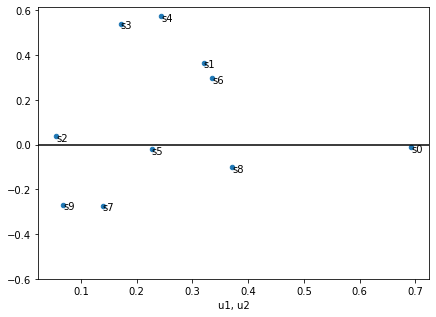

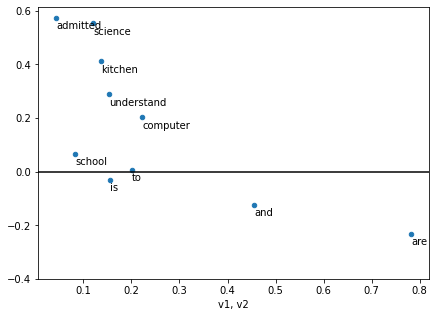

In [ ]:
c_plot = df_coordinates.plot(kind='scatter', x='cx', y='cy')
c_plot.axhline(y=0, color='black', linestyle='-')
c_plot.set_ylim(bottom=-0.6)
c_plot.set_xlabel('u1, u2')
c_plot.set_ylabel('')
for i in range(10):
    c_plot.annotate('s'+str(i), (cx[i], cy[i]-0.02))
#c_plot.annotate("Point 1", (6.422466e-01, -9.503377e-03))

d_plot = df_coordinates.plot(kind='scatter', x='dx', y='dy')
d_plot.axhline(y=0, color='black', linestyle='-')
d_plot.set_ylim(bottom=-0.4)
d_plot.set_xlabel('v1, v2')
d_plot.set_ylabel('')
for i, txt in enumerate(keywords):
    d_plot.annotate(txt, (dx[i], dy[i]-0.04))